In [255]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 13})

### A study on Semi autonomous particle swarm optmizer <br/>comparing sequential and parallel gradient calculation
#### Table of contents:
* [Mean Execution Time Comparison](#exec-times)
* [Optmization Accuracy Comparison](#accuracy)

#### Optmization parameters:
    'n' : 20,                  # Number of Particles
	'm' : 3000,                # Iterations
	'stop' : 1e-9,             # Stop criterion
	'n_dimensions' : 5,        # Number of dimensions     
	'min_inertia' : .9,        # Inertial weight
	'max_inertia' : .4,        # Inertial weight
	'c1' : 2,                  # Cognitive coefficient
	'c2' : 2,                  # Social coefficient
	'c_max' : 3,               # Max consecutive evaluations before finish optmizing
	'epsilon' : 1e-2,          # If the algorithm cannot improve fitness it must stop
	'd_low' : .2,              # Lower threshold for diversity control
	'd_high' : .225,           # Upper threshold for diversity control

In [105]:
# Importing data
url = 'https://raw.githubusercontent.com/marceloFA/sapso/master/exec_times/sequencial_sapso_exec_times.txt'
df = pd.read_csv(url)
df = df.drop(columns=['Unnamed: 6'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 6 columns):
parallel     3240 non-null bool
f_name       3240 non-null object
n_dims       3240 non-null int64
min_found    3240 non-null float64
n_iters      3240 non-null int64
exec_time    3240 non-null float64
dtypes: bool(1), float64(2), int64(2), object(1)
memory usage: 129.8+ KB


In [72]:
# Data filtering
def query(parallel,operation):
    query = df[df['parallel'] == parallel].groupby('n_dims')
    
    if operation == 'std':
        return query['exec_time'].std()
    elif operation == 'mean':
        return query['exec_time'].mean()

seq_mean = query(False,'mean')
seq_std = query(False,'std')

par_mean = query(True,'mean')
par_std = query(True,'std')

index = par_mean.index

<a name="exec-times"> </a>
## Mean Execution Time Comparison

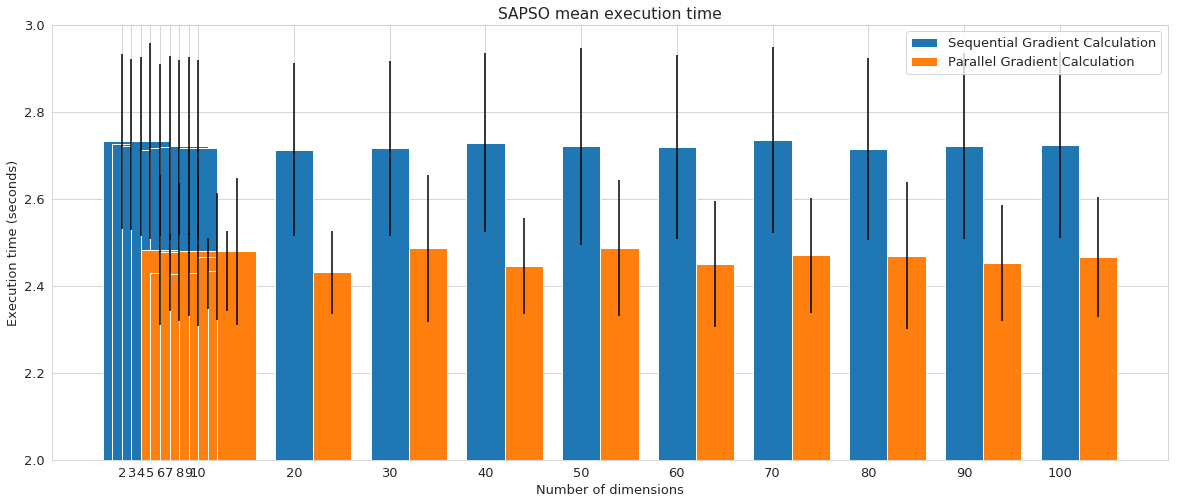

In [73]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_ylim(bottom=2,top=3)
bar_width = 4

rects1 = ax.bar(index, serial_mean, bar_width,
                yerr=serial_std,label='Sequential Gradient Calculation')

rects2 = ax.bar(index + bar_width, numba_mean, bar_width,
                yerr=numba_std,label='Parallel Gradient Calculation')

ax.set_ylabel('Execution time (seconds)')
ax.set_xlabel('Number of dimensions')
ax.set_title('SAPSO mean execution time')
ax.set_xticks(index)
ax.set_xticklabels((str(n_dims) for n_dims in index))
ax.legend()

<a name="accuracy"></a>
### Optmization Accuracy Comparison

In [258]:
def query(parallel,f_name):
    '''Filtra o dataframe por condições especificadas nos args'''
    return df.where((df['parallel']==parallel)&(df['f_name']==f_name)).dropna()

fname_list = df['f_name'].unique()
n_dims_list = df['n_dims'].unique()

sequential = pd.DataFrame(index=n_dims_list)
parallel =  pd.DataFrame(index=n_dims_list)
sequential.index.name = 'n dims'
parallel.index.name = 'n dims'

for p in [True,False]:
    for f in fname_list:
        data = query(p,f)
        if p:
            parallel[f] = data.groupby('n_dims').mean()['min_found']
        else:
            sequential[f] = data.groupby('n_dims').mean()['min_found']

### SAPSO com gradiente calculado de forma convencional teve melhores resultados médios nos seguintes testes:
Obs: os valores não nulos são as observações onde o algoritmo obteve melhores resultados

In [270]:
sequential[sequential<parallel].dropna(thresh=1).dropna(axis='columns') 
# comment second call of 'dropna' in case of strange results

,rosenbrock
n dims,
2,0.001751
3,0.001848
4,0.001945
5,0.002796
6,0.001096
7,0.001945
8,0.002824
9,0.001218
10,0.001345


In [216]:
'''
Improvements q eu tenho q fazer:
calcular o gradiente só para as particulas necesssárias
implementar um critério de parada
'''

'\nImprovements q eu tenho q fazer:\ncalcular o gradiente só para as particulas necesssárias\nimplementar um critério de parada\n'